In [1]:
import Script.Image as Image
import matplotlib.pyplot as plt
import pandas as pd
from math import floor
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

# UNSUPERVISED LEARNING

In [ ]:
# Create training dataset
training = pd.read_csv('Clean_Training.csv')
X = training[['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']]
Y = training['Content']

In [2]:
kmeans = KMeans(n_clusters=8)
pred_km = kmeans.fit(X)

NameError: name 'X' is not defined

# SUPERVISED LEARNING

In [ ]:
# Create validation dataset
NW_path = "../Sentinel-2/Validation/NW_020120/020120_20.tif"
img_020120 = Image.make_dataset(NW_path)
NW_020120 = img_020120['df']

In [ ]:
path = "../Sentinel-2/Validation/NW_020120/020120_20_RGB.tif"
img=mpimg.imread(path)
plt.figure(figsize=(70,70))
plt.imshow(img)

In [6]:
# Create validation dataset
NW_path = "../Sentinel-2/Validation/NW_070120/070120_20.tif"
img_07012020 = Image.make_dataset(NW_path)
NW_07012020 = img_07012020['df']

RasterioIOError: ../Sentinel-2/Validation/NW_070120/070120_20.tif: No such file or directory

In [ ]:
path = "../Sentinel-2/Validation/NW_070120/070120_20_RGB.tif"
img=mpimg.imread(path)
plt.figure(figsize=(70,70))
plt.imshow(img)

## Logistic Regression

In [ ]:
# Train model
LogReg=LogisticRegression(max_iter = 300)
LogReg.fit(X, Y);

#### Data from 02/01/20

In [ ]:
# Predict model
NW_020120 = NW_020120[['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13']]
pred_NW_020120 = LogReg.predict(NW_020120)

In [ ]:
img = pred_NW_020120.reshape(img_020120['dim'])
Image.show_pred(img, 'Blues')

#### Data from 07/01/20

In [18]:
pred_NW_07012020 = LogReg.predict(NW_07012020)

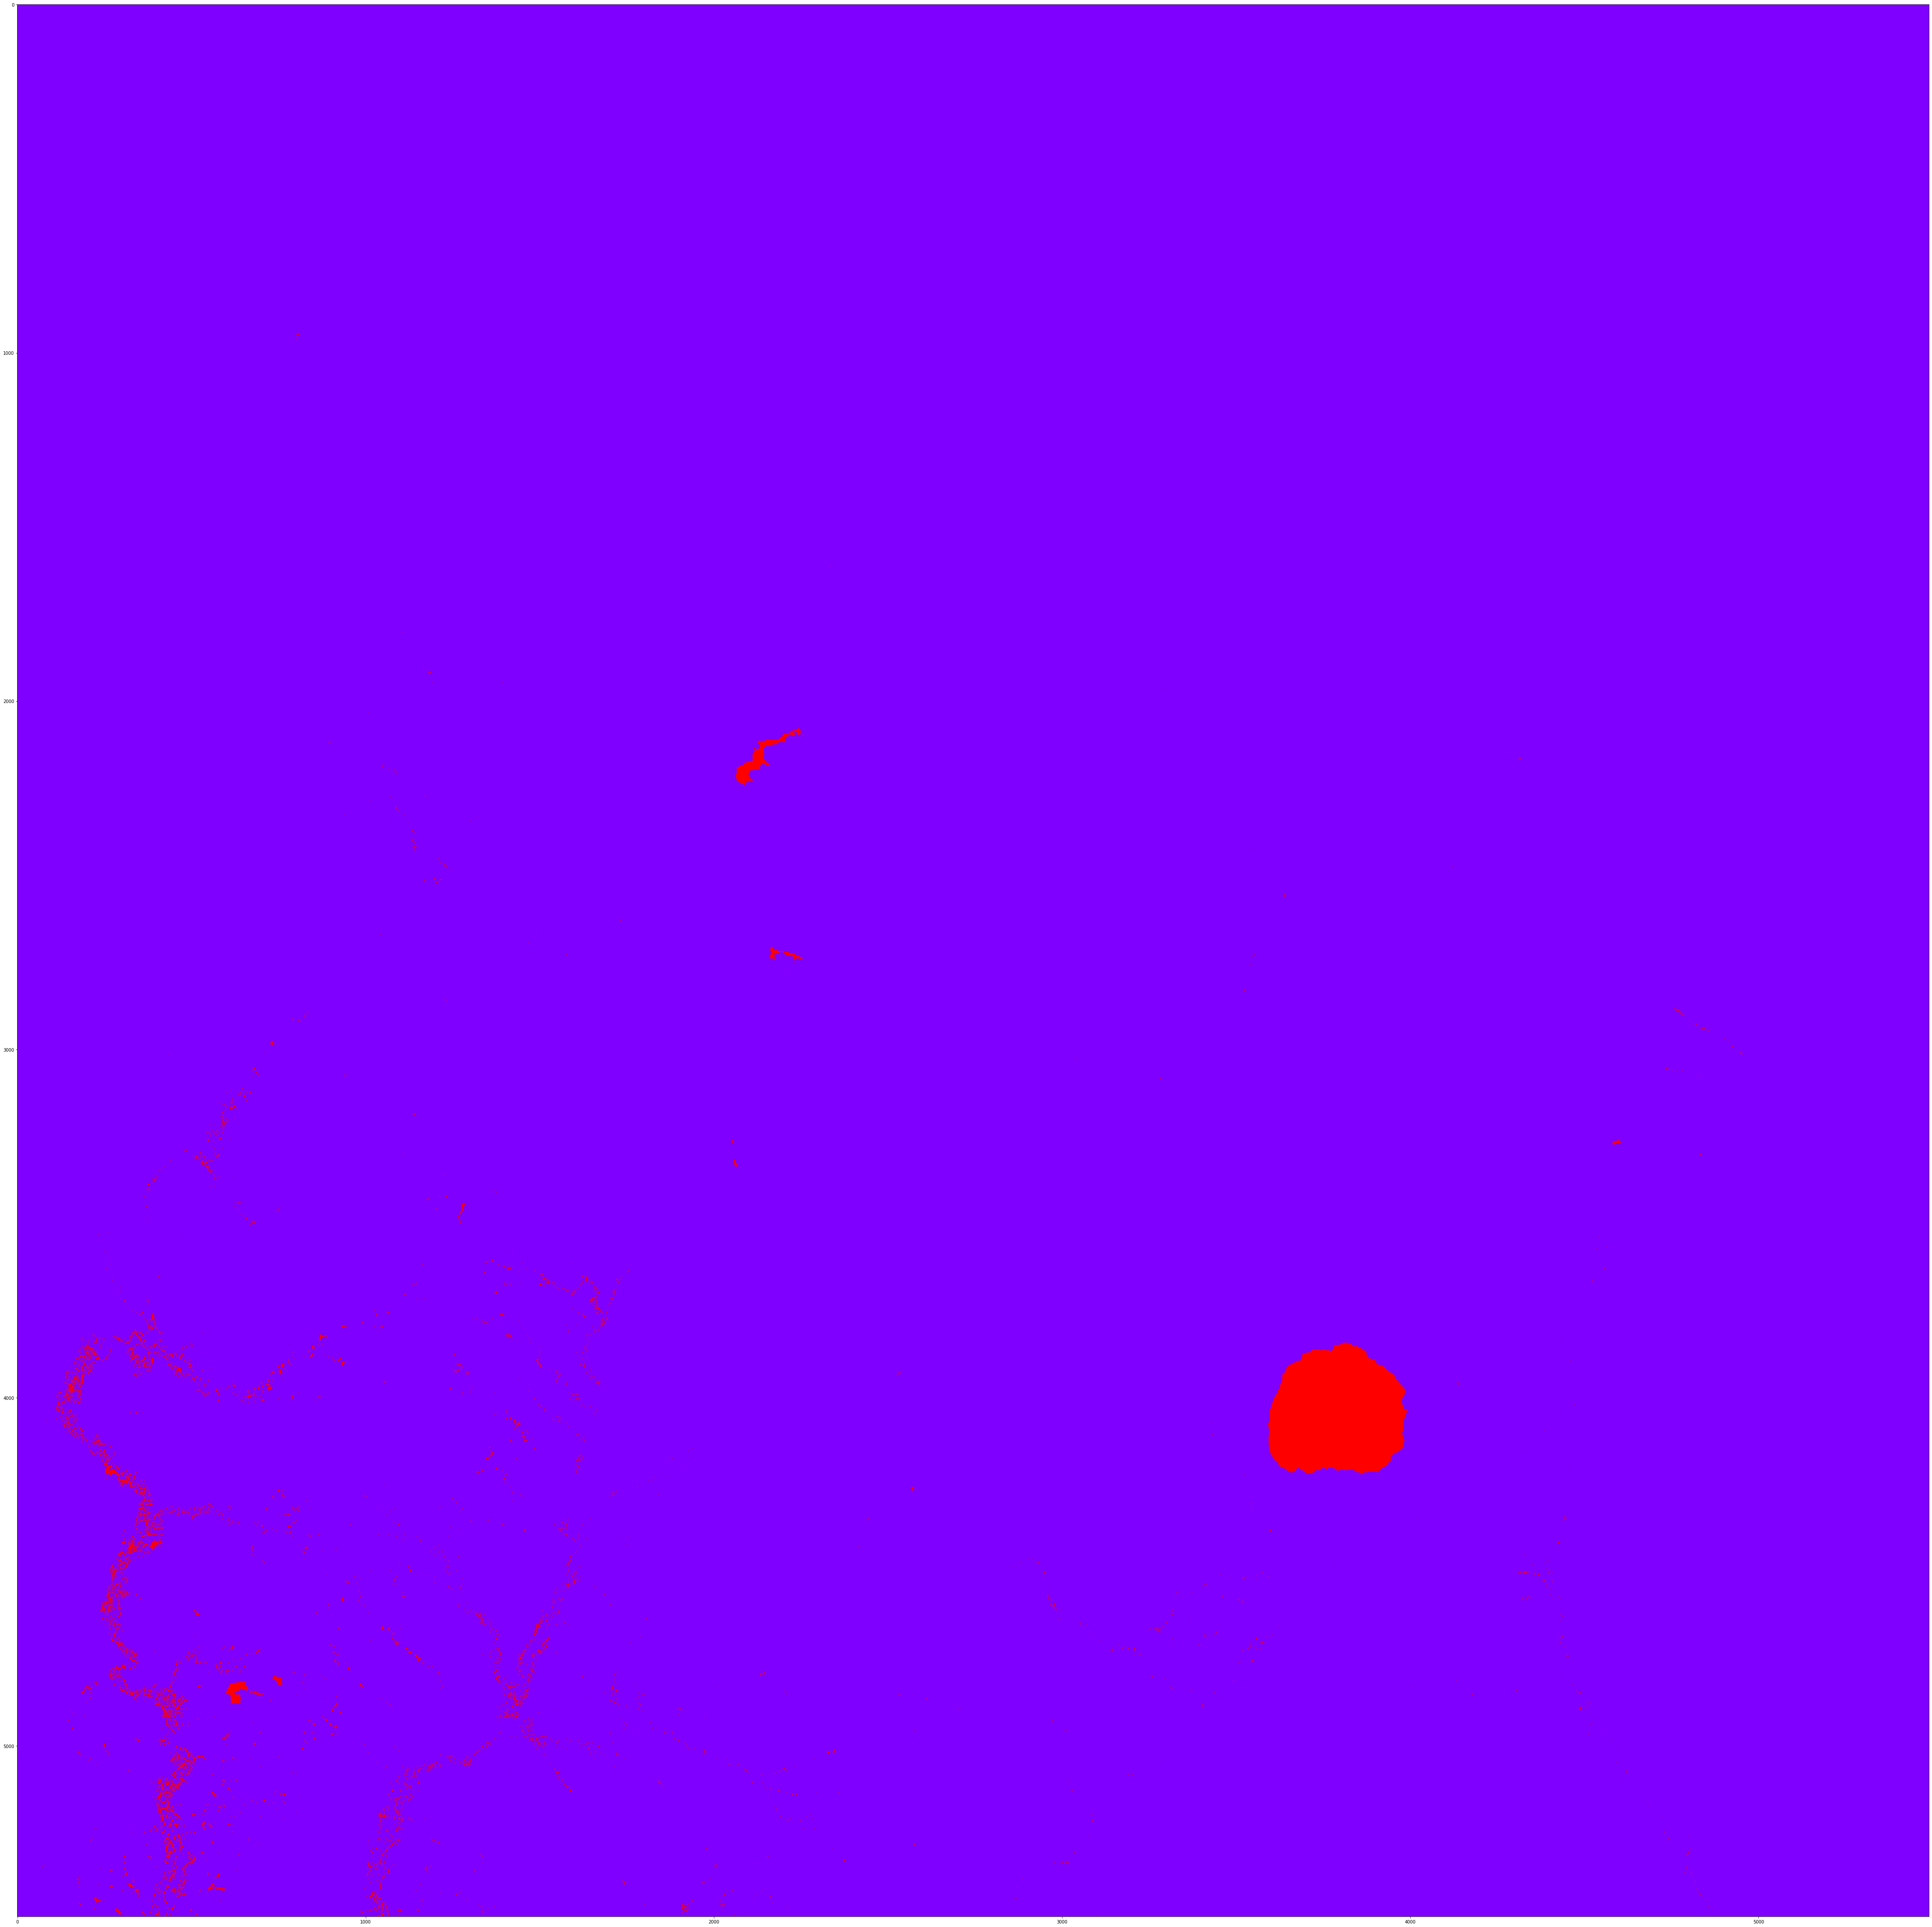

In [19]:
img = pred_NW_07012020.reshape(img_07012020['dim'])
Image.show_pred(img, 'rainbow')

## Decision Trees

In [13]:
DT = DecisionTreeClassifier()
DT.fit(X, Y);

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

## Random Forest 